#**(3)Naive Bayes(Supervised learning, Classification Based)**

- Naive Bayes algorithm is a supervised learning algorithm, which is based on **Bayes theorem** and used for solving classification problems.
- It is mainly used in **text classification** that includes a high-dimensional training dataset.


- Some popular use case  of Naïve Bayes Algorithm are **spam filtration, Sentimental analysis,recommendation systems ,text classification and classifying articles etc.**



##**Bayes' Theorem**

- Bayes Theorem is a method to determine conditional probabilities that is, **the probability of one event occurring given that another event has already occurred.**

- The formula for Bayes' theorem is given as:
$$P(\text{A}|\text{B})=\frac{P(\text{B}|\text{A}) \ P(\text{A})}{P(\text{B})}$$

- Where,$P(\text{A}|\text{B})$ is Probability of A occuring given evidence B has already occured( P(A|B) is also called posterior probability),$P(\text{B}|\text{A})$ is Probability of B occuring given evidence A has already occured(P(B|A) is  also called Likelihood probability),$P(\text{A})$ is Probability of A occuring,$P(\text{B})$ is Probability of B occuring.


- Lets $y$ is dependent(target) variable and ($x_1$, $x_2$, $x_3$,....., $x_n$) are independent variables features.Then we can write above formula as follows also,

$$P(y|x_1, x_2 ..... x_n) = \frac{P(x_1, x_2 ... x_i ... x_n|y) \ P(y)}{P(x_1, x_2 ... x_i ... x_n)}$$

$$P(y|x_1, x_2 ..... x_n) = \frac{[P(x_1|y)P(x_2|y)......P(x_n|y)] \ P(y)}{P(x_1)P(x_2)..... P(x_n)}$$



##**Working of Naive Bayes' Classifier:**

- Suppose we have a dataset of weather conditions and corresponding target variable "Play". So using this dataset we need to decide that whether we should play or not on a particular day according to the weather conditions

- **step1:**Convert the given dataset into frequency tables.
- **step2:**Generate Likelihood table by finding the probabilities of given features.
- **step3:**Now, use Bayes theorem to calculate the posterior probability.



<figure align="center">
<img src="https://drive.google.com/uc?id=1T4wUb-EjKhD6ceMQPwJgfiuD5VW1nGnr" height="400px", width="600px"> 
</figure>

- **Applying Bayes'theorem:**

- P(Yes|Sunny)= P(Sunny|Yes)*P(Yes)/P(Sunny)

- P(Sunny|Yes)= 3/9= 0.33

- P(Yes)=9/14 = 0.64

- P(Sunny)= 5/14 = 0.36

- So, P(Yes|Sunny) = 0.33 * 0.64 / 0.36 =$\approx$ 0.60

- **Also we have to calculate**

- P(No|Sunny)= P(Sunny|No)*P(No)/P(Sunny)

- P(Sunny|NO)= 2/5=0.4

- P(No)= 5/14=0.36

- P(Sunny)= 5/14 = 0.36


- So P(No|Sunny)= 0.4*0.35/0.36 =$\approx$0.40



- **So as we can see from the above calculation that P(Yes|Sunny)>P(No|Sunny).Hence on a Sunny day, Player can play the game.**


- Similarly we can apply this process in multipal independent features at once   as follows.

- Lets $y$ is dependent(target) variable and ($x_1$, $x_2$, $x_3$,....., $x_n$) are independent variables features.Then we can write above formula as follows also,

$$P(y|x_1, x_2 ..... x_n) = \frac{P(x_1, x_2 ... x_i ... x_n|y) \ P(y)}{P(x_1, x_2 ... x_i ... x_n)}$$

$$P(y|x_1, x_2 ..... x_n) = \frac{[P(x_1|y)P(x_2|y)......P(x_n|y)] \ P(y)}{P(x_1)P(x_2)..... P(x_n)}$$



##**Types of Naive Bayes:**

- **(a)Gaussian Naive Bayes:** It is used when independent variables are **continuous in nature**. It assumes that all the variables have a normal distribution ,if not then transform them to the features having normal distribution.Import **from sklearn.naive_bayes import GaussianNB**  from scikit-learn.

- **(b)Bernoulli Naive Bayes:** It  is used when the independent features of our dataset have binary values ie. 0 or 1,yes or no etc.Import **from sklearn.naive_bayes import BernoulliNB**  from scikit-learn.

- **(c)Multinomial Naive Bayes:** It is used when the independent features of our dataset have **discrete values(count the occerance,frequency).This is used when the features represent the frequency.**Import **from sklearn.naive_bayes import MultinomialNB**  from scikit-learn.

##**Model building in Scikit-learn:**
- Since we have dataset of weather conditions and corresponding target variable "Play".Using this dataset we need to decide that whether we should play or not on a particular day according to the weather conditions.


In [96]:
from google.colab import drive     #mount your Google Drive in your virtual machine(VM).
drive.mount('/gdrive')              #Access  the data  drive because of different server of colab and drive.

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [98]:
weather=pd.read_csv('/gdrive/My Drive/ML Project /Feature Engineering /4.ML Algorithms/tennis.csv',quoting=3)
                                 #Read data file with path location step by step path location from My Drive.

In [99]:
weather.head()

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


###**Encoding Features:**First, you need to convert these string labels into numbers. for example: 'Overcast', 'Rainy', 'Sunny' as 0, 1, 2. This is known as label encoding. Scikit-learn provides LabelEncoder library for encoding labels with a value between 0 and one less than the number of discrete classes.



In [101]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()                 
weather["outlook1"]=label_encoder.fit_transform(weather["outlook"])
weather["temp1"]=label_encoder.fit_transform(weather["temp"])
weather["humidity1"]=label_encoder.fit_transform(weather["humidity"])
weather["windy1"]=label_encoder.fit_transform(weather["windy"])
weather["play1"]=label_encoder.fit_transform(weather["play"])


Note that we have added a new column which contains numerical value associated to categorical value and still the old column is present in the dataframe. This column needs to be removed before we feed the final preprocess data to machine learning model to learn.

In [102]:
weather.drop(['outlook','temp',"humidity","windy","play"], axis=1,inplace=True)


In [103]:
print(weather)

    outlook1  temp1  humidity1  windy1  play1
0          2      1          0       0      0
1          2      1          0       1      0
2          0      1          0       0      1
3          1      2          0       0      1
4          1      0          1       0      1
5          1      0          1       1      0
6          0      0          1       1      1
7          2      2          0       0      0
8          2      0          1       0      1
9          1      2          1       0      1
10         2      2          1       1      1
11         0      2          0       1      1
12         0      1          1       0      1
13         1      2          0       1      0


In [104]:
#split dataset in features and target variable
feature_cols = ["outlook1", "temp1", "humidity1", "windy1"]
X = weather[feature_cols] # Features/independent variables
y = weather.play1 # Target variable/dependent variables


# or Also we can write above code as this also. 
X = weather.drop('play1', axis=1)   #Features/independent variables
y = weather['play1']               # Target variable/dependent variables

In [174]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [175]:
#Import MultinomialNB Naive Bayes model because our dataset follow frequency tabel.
from sklearn.naive_bayes import MultinomialNB 
#Create a MultinomialNB Classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [177]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)
pd.DataFrame(y_pred)   ##Convert numpy array generated by sklearn libraries to orginal dataframe.


,0
0,1
1,1
2,0
3,1
4,1
5,1


Performance Evaluation

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


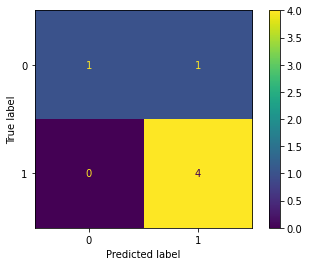

In [178]:
from sklearn.metrics import plot_confusion_matrix
display = plot_confusion_matrix(clf ,X_test,y_test)
plt.show()

In [179]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8333333333333334


In [180]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print(precision)

0.8


In [181]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print(recall)

1.0


In [182]:
from sklearn.metrics import f1_score 
f1_score = f1_score(y_test, y_pred)
print(f1_score)

0.888888888888889


Tips to improve the model:


Try transforming the variables using transformations like BoxCox or YeoJohnson to make the features near Normal.